# ANALYZING, and VISUALIZING DATA

##### NIMMY GEORGE

Project 4


#### ACT REPORT

In [1]:
##Importing the required libraries
import matplotlib
import pandas
import numpy 
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline  

In [2]:
##getting the plot
matplotlib.style.use('ggplot')

In [4]:
##getting the csv file
datas = pandas.read_csv('twitter_archive_master.csv')
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 16 columns):
tweet_id                1993 non-null int64
timestamp               1993 non-null object
source                  1993 non-null object
text                    1993 non-null object
expanded_urls           1993 non-null object
rating_numerator        1993 non-null float64
rating_denominator      1993 non-null float64
name                    1993 non-null object
favorites               1993 non-null int64
retweets                1993 non-null int64
user_followers          1993 non-null int64
jpg_url                 1993 non-null object
dog_stage               1993 non-null object
prediction_algorithm    1685 non-null object
confidence_level        1993 non-null float64
dog_gender              862 non-null object
dtypes: float64(3), int64(4), object(9)
memory usage: 249.2+ KB


In [5]:
##after getting the info, top 5 parts are displayed
datas.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,jpg_url,dog_stage,prediction_algorithm,confidence_level,dog_gender
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,38952,8636,6629272,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,0.000000,NaN
1,679877062409191424,2015-12-24 04:11:37,Twitter for iPhone,Meet Penelope. She's a bacon frise. Total babe...,https://twitter.com/dog_rates/status/679877062...,5.0,10.0,Penelope,2107,707,6629646,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,None,NaN,0.000000,NaN
2,680055455951884288,2015-12-24 16:00:30,TweetDeck,"Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10.0,10.0,Sammy,17919,7867,6629646,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,None,Samoyed,0.995466,male
3,680070545539371008,2015-12-24 17:00:27,TweetDeck,Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9.0,10.0,Emmie,2755,965,6629646,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,None,Shih-Tzu,0.121811,NaN
4,680085611152338944,2015-12-24 18:00:19,TweetDeck,This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12.0,10.0,by,13700,9801,6629646,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,NaN,0.000000,NaN


In [6]:
# Cols are required to required datatypes

datas['tweet_id'] = datas['tweet_id'].astype(object)
datas['timestamp'] = pandas.to_datetime(datas.timestamp)
datas['source'] = datas['source'].astype('category')
datas['dog_stage'] = datas['dog_stage'].astype('category')
datas['dog_gender'] = datas['dog_gender'].astype('category')

datas.set_index('timestamp', inplace=True)
datas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1993 entries, 2017-08-01 16:23:56 to 2016-06-03 01:07:16
Data columns (total 15 columns):
tweet_id                1993 non-null object
source                  1993 non-null category
text                    1993 non-null object
expanded_urls           1993 non-null object
rating_numerator        1993 non-null float64
rating_denominator      1993 non-null float64
name                    1993 non-null object
favorites               1993 non-null int64
retweets                1993 non-null int64
user_followers          1993 non-null int64
jpg_url                 1993 non-null object
dog_stage               1993 non-null category
prediction_algorithm    1685 non-null object
confidence_level        1993 non-null float64
dog_gender              862 non-null category
dtypes: category(3), float64(3), int64(3), object(6)
memory usage: 208.6+ KB


In [7]:
## To get a decription
datas.describe()

,rating_numerator,rating_denominator,favorites,retweets,user_followers,confidence_level
count,1993.000000,1993.000000,1993.000000,1993.000000,1.993000e+03,1993.000000
mean,12.213638,10.510286,8882.965379,2731.905168,6.629520e+06,0.464930
std,41.473908,7.263336,12609.068748,4714.424803,1.691947e+02,0.339545
min,0.000000,7.000000,80.000000,13.000000,6.629057e+06,0.000000
25%,10.000000,10.000000,1930.000000,612.000000,6.629344e+06,0.140394
50%,11.000000,10.000000,4053.000000,1318.000000,6.629536e+06,0.458746
75%,12.000000,10.000000,11192.000000,3139.000000,6.629660e+06,0.776400
max,1776.000000,170.000000,143885.000000,77689.000000,6.629803e+06,0.999956


To get a relationship between variables, a corelation map is formed using the datas



Text(0.5, 1, 'Correlation Map')

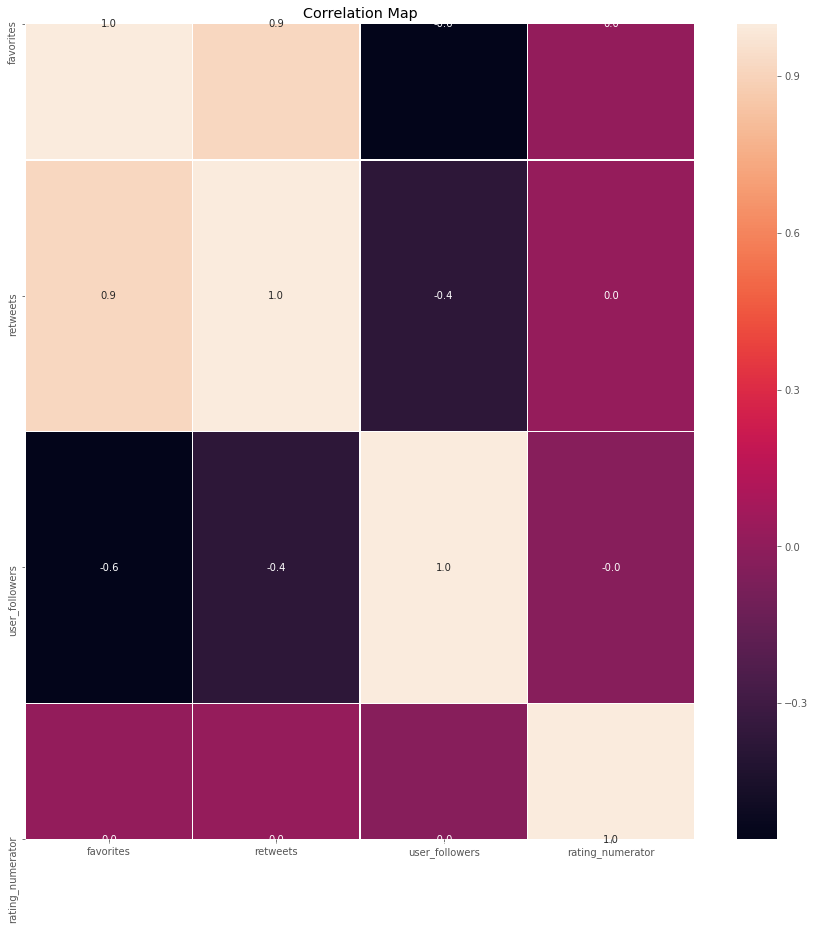

In [8]:
##to get required corelation map
f,ax = plt.subplots(figsize=(15, 15))
seaborn.heatmap(datas[['source', 'favorites','retweets',
                'user_followers','rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

Using the seaborn packages, I have plotted a correlation plot and I have found certain points from this.

1.We can see that between retweet and favourites has strong correlation

2.Weak corelation can be founded between retweet and user followers

And thus we can conclude that  ratings will not get affected by other variables






#### Favorites Vs Tweet Retweet.

Text(0.5, 1.0, 'Retweets Vs favorites')

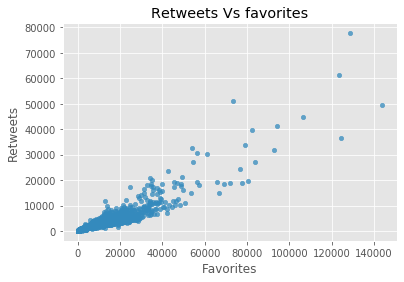

In [9]:
##Here we are plotting another plot
datas.plot(kind='scatter',x='favorites',y='retweets', alpha =0.75)
plt.xlabel('Favorites')## ploting x variable
plt.ylabel('Retweets')## ploting y variable
plt.title('Retweets Vs favorites')##giving the title

 We can see that Retweet is high compared with favorites after ploting the garph

#### RATING

Text(0, 0.5, 'Rating')

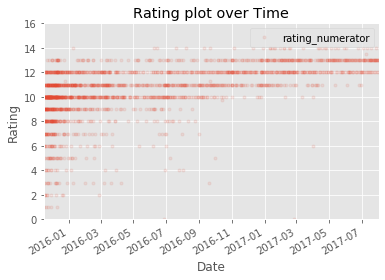

In [10]:

##For analysing another plot range can be considered as [0,16] and let outliers be(1776 and 410)
datas.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .1)
plt.title('Rating plot over Time')## giving title
plt.xlabel('Date')##plotting x label
plt.ylabel('Rating')## plotting y label

After analysing the plot we can see that the page start shows small rating.

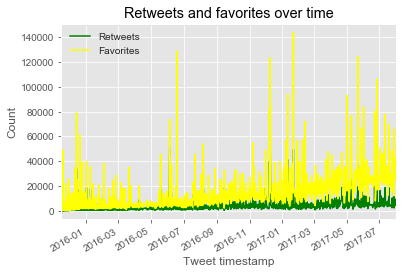

In [11]:
datas['retweets'].plot(color = 'green', label='Retweets')
datas['favorites'].plot(color = 'yellow', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')## giving x label
plt.ylabel('Count')## giving y label
plt.title('Retweets and favorites over time') ##giving title
plt.savefig('retweets_favorites.png')
plt.show()

Here ratings get higher

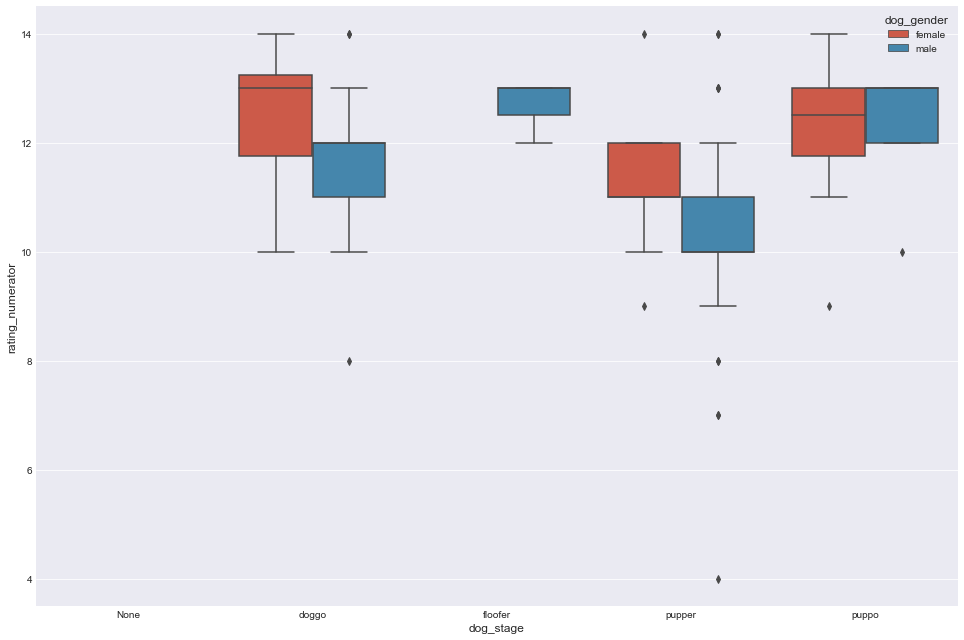

In [13]:
##Here we use seaborn package to draw another plot
seaborn.catplot(kind='box',        
               y='rating_numerator',       
               x='dog_stage', 
               hue='dog_gender',  
               data=datas[datas['dog_stage'] != 'None'], 
               height=9,               
               aspect=1.5,   
               legend_out=False) 

After analysing we can see that female dogs are more than male dogs




(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

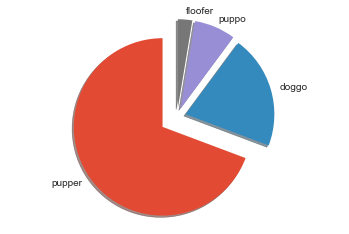

In [15]:
# pie chart is used to analyse dog stage
dog_stage_count = list(datas[datas['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = datas[datas['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

In [16]:
datas[datas['dog_stage'] != 'None'].groupby('dog_stage')['rating_numerator'].mean()## Here grouping is done 


dog_stage
None             NaN
doggo      11.888889
floofer    11.875000
pupper     10.638066
puppo      12.043478
Name: rating_numerator, dtype: float64

After analysing the pie chart and rating we can see taht puper is the most owed dog but have lesser rating

#### Conclusion
The Twitter account WeRateDogs is dedicated to facetiously reviewing pictures of canines doing adorable poses. Canines are rated on a scale of 1 to 10 , but are invariably given ratings in more than the utmost. 

If we are cerebrating of adopting a canine, get a floof - distant from being pupper a minimum of still within the stage of puppo yet not a doggo to quantify more togother